## Caracterización de residuos

In [221]:
from utils import func_tools
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
importlib.reload(func_tools);

### Cargar los datos y inputar elementos faltantes

In [208]:
estratificacion = pd.read_csv('estratificacion.csv',delimiter=',', index_col='ID')
estratificacion = estratificacion.fillna(0)
data_csv_zona = pd.read_csv('residuosrecogidos_zona.csv', delimiter=',')
caracterizacion = pd.read_csv('caracterizacion.csv', delimiter=',')
data_csv_localidad = pd.read_csv('residuosrecogidos_localidad.csv', delimiter=',')
data_csv_zona = func_tools.fillna_col_anterior(data_csv_zona)
data_csv_localidad = func_tools.fillna_2013(data_csv_localidad, estratificacion, data_csv_zona )

### Definir parámetros y modelo

In [209]:
parametros = func_tools.iniciar()

Inicio ....
Modelo a entrenar para zonas o localidades? = localidades
Tamaño de la ventana para suavizar las series entre 1 - 4 
Tamaño de la ventana para el suavizado de las series? = 2
Modelos disponibles SVR y LSTM (con pasos de tiempo)
Cuál modelo quiere entrenar? = SVR
Número de prediciones no superior a 24 meses
Número de prediciones a realizar? (en meses) = 15
Número de entrenamientos entre 100 - 250
Número de entrenamientos? = 150
Número de validaciones cruzadas entre 5 - 25 
Cuántas validaciones cruzadas? = 15
OK... Parámetros guardados


In [210]:
parametros

['localidades', '2', 'SVR', 150, 15, '15']

### Generar series

In [222]:
dic_series, series_list = func_tools.generar_series(estratificacion, data_csv_zona, data_csv_localidad, parametros)

### Entrenamiento y predicción

Score entrenamiento R^2:  0.7068061018061929
Support vector (Coeficiente): 0.393


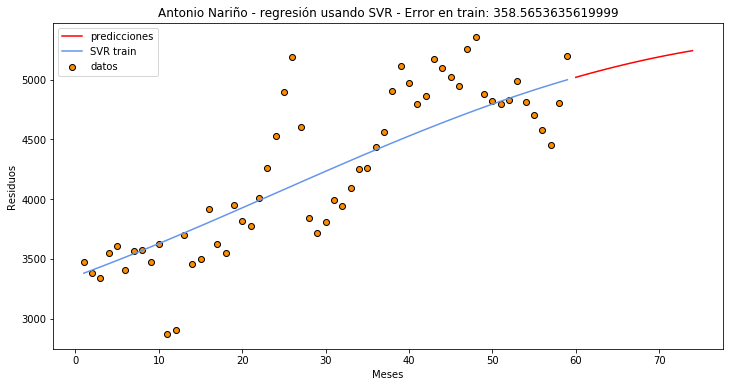

Score entrenamiento R^2:  0.9439924378015979
Support vector (Coeficiente): 0.393


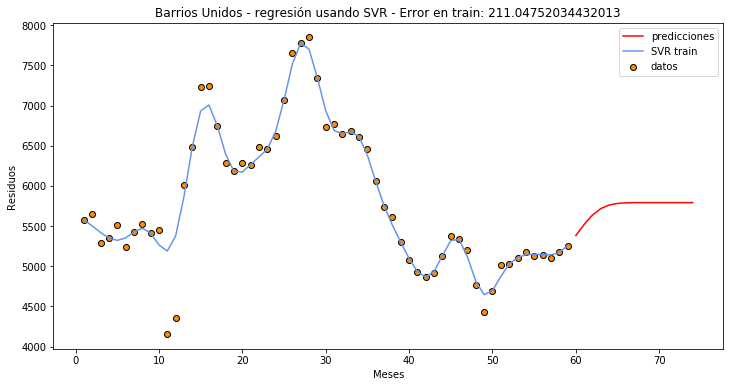

Score entrenamiento R^2:  0.6208513387672228
Support vector (Coeficiente): 0.393


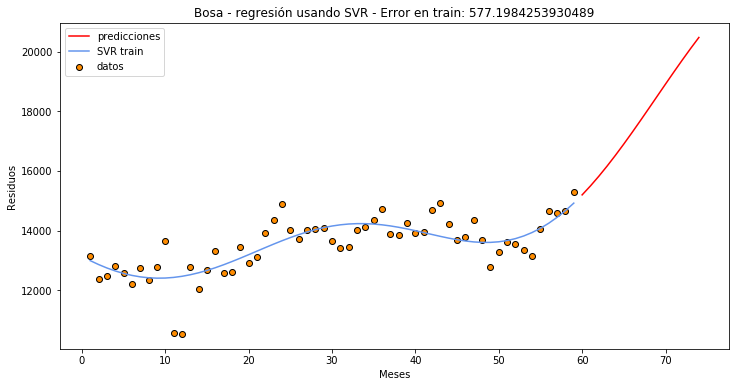

Score entrenamiento R^2:  0.6442977456746624
Support vector (Coeficiente): 0.393


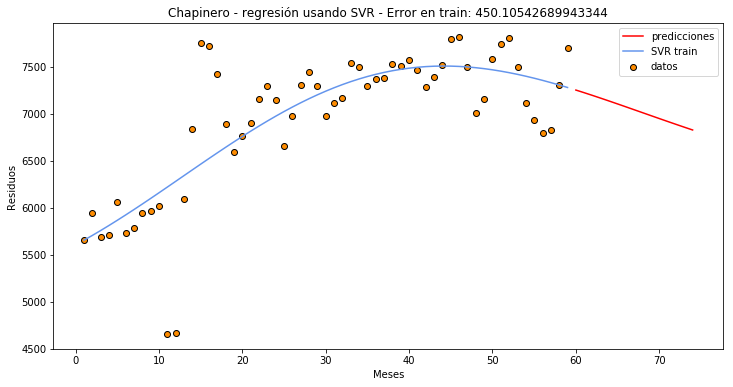

Score entrenamiento R^2:  0.9511550254425883
Support vector (Coeficiente): 0.393


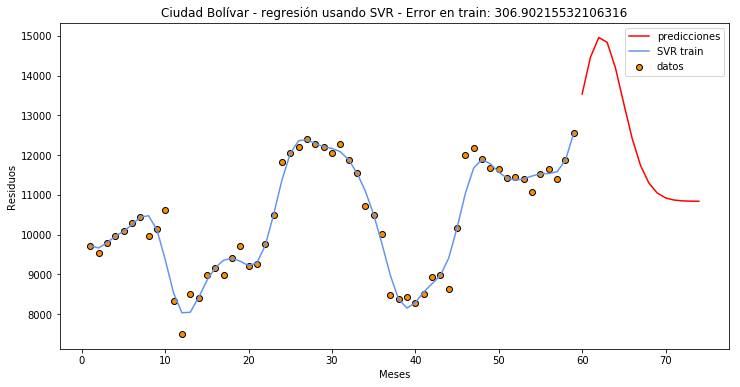

Score entrenamiento R^2:  0.8165524635327983
Support vector (Coeficiente): 0.393


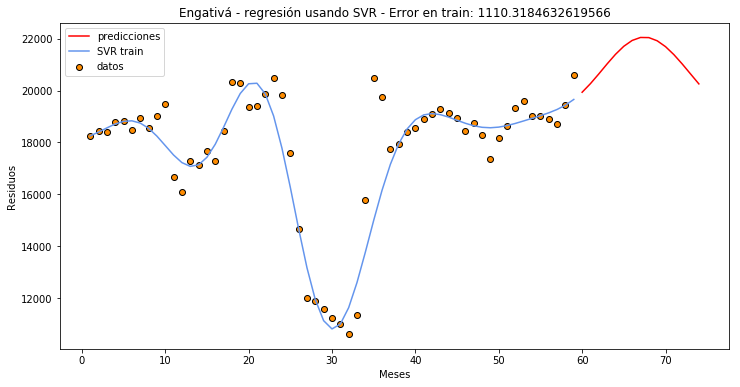

Score entrenamiento R^2:  0.9242644135840684
Support vector (Coeficiente): 0.393


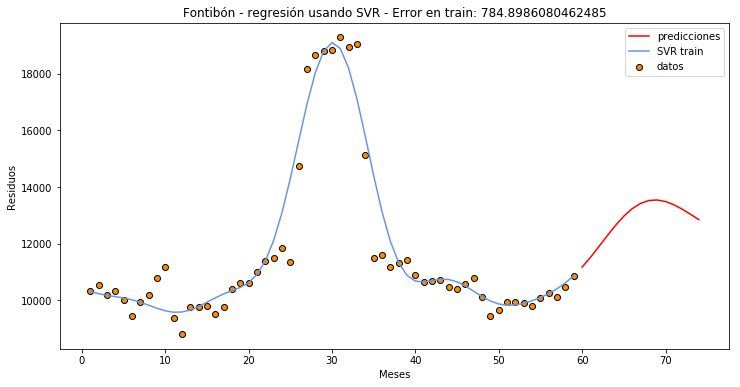

Score entrenamiento R^2:  0.1276198380395256
Support vector (Coeficiente): 0.393


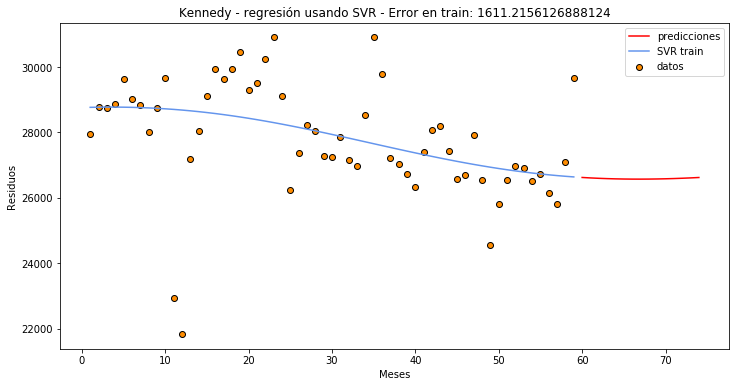

Score entrenamiento R^2:  0.793152279162732
Support vector (Coeficiente): 0.393


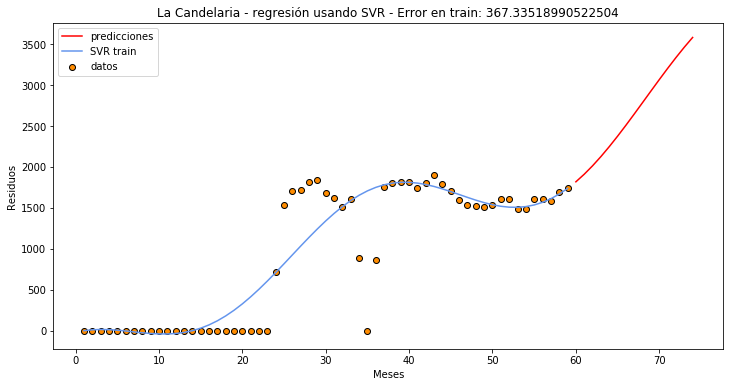

Score entrenamiento R^2:  0.6668150163914155
Support vector (Coeficiente): 0.393


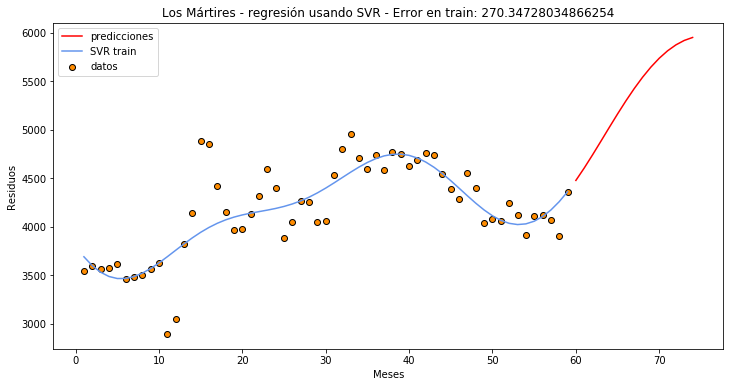

Score entrenamiento R^2:  0.9993515625369194
Support vector (Coeficiente): 0.393


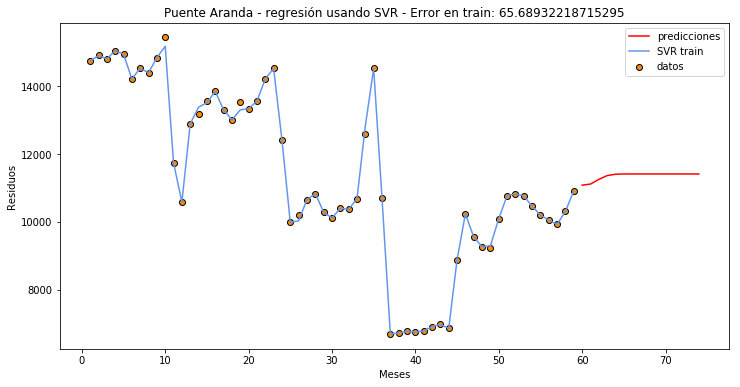

Score entrenamiento R^2:  0.13870409604476275
Support vector (Coeficiente): 0.393


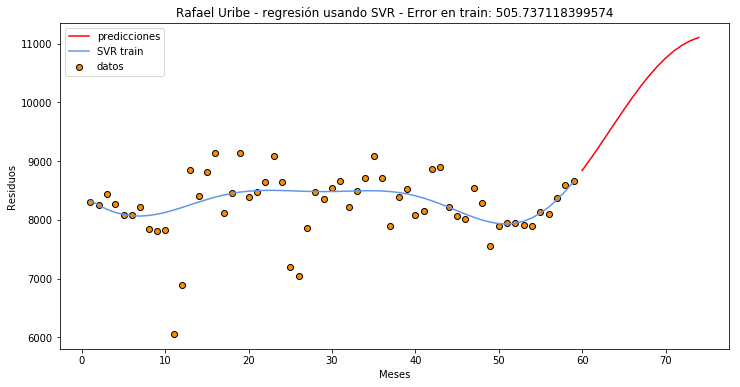

Score entrenamiento R^2:  0.1590012456922768
Support vector (Coeficiente): 0.393


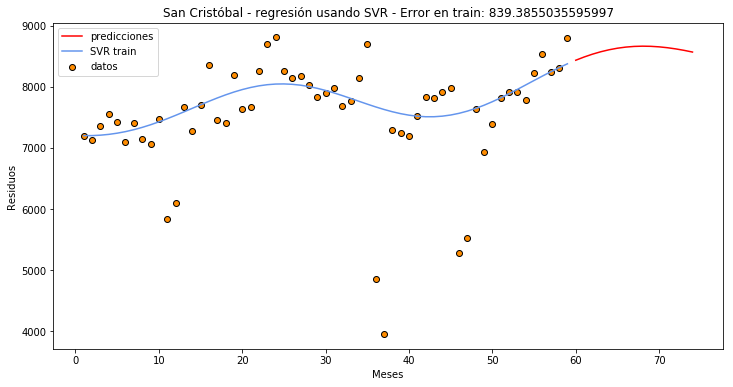

Score entrenamiento R^2:  0.6945889949887366
Support vector (Coeficiente): 0.393


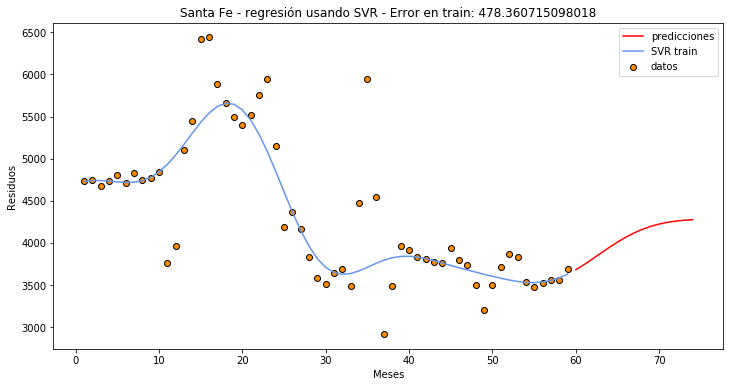

Score entrenamiento R^2:  0.3695330612538542
Support vector (Coeficiente): 0.393


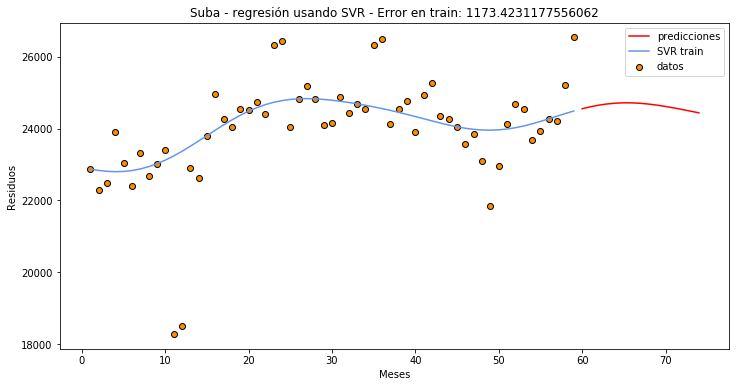

Score entrenamiento R^2:  0.9690311555985385
Support vector (Coeficiente): 0.360


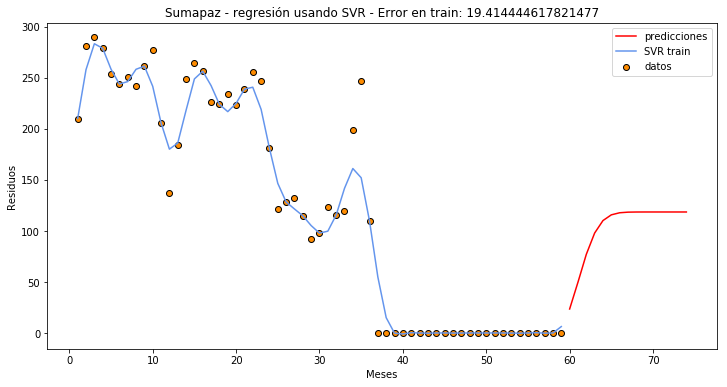

Score entrenamiento R^2:  0.9364569349506147
Support vector (Coeficiente): 0.393


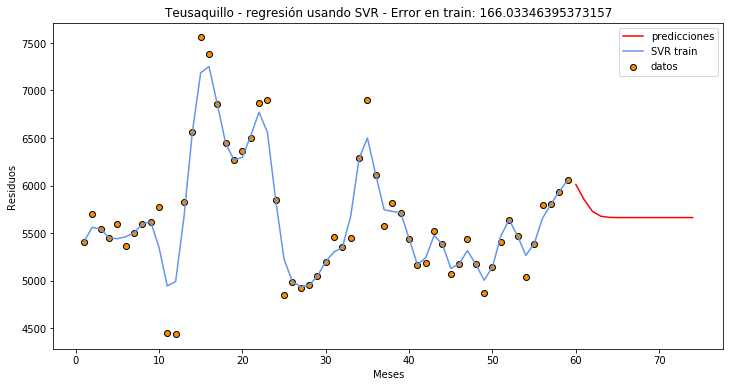

Score entrenamiento R^2:  0.8261723575428823
Support vector (Coeficiente): 0.393


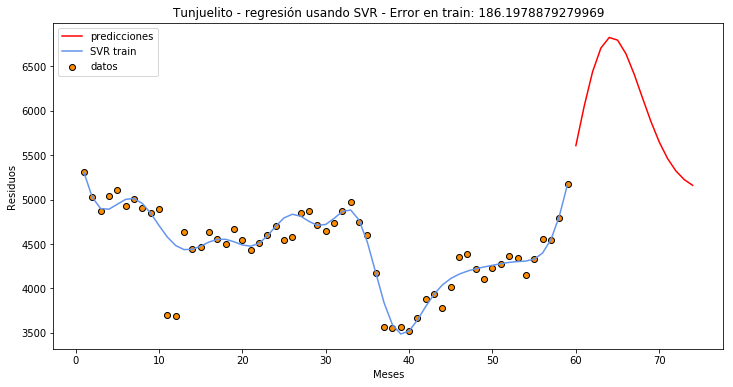

Score entrenamiento R^2:  0.17557153465515318
Support vector (Coeficiente): 0.393


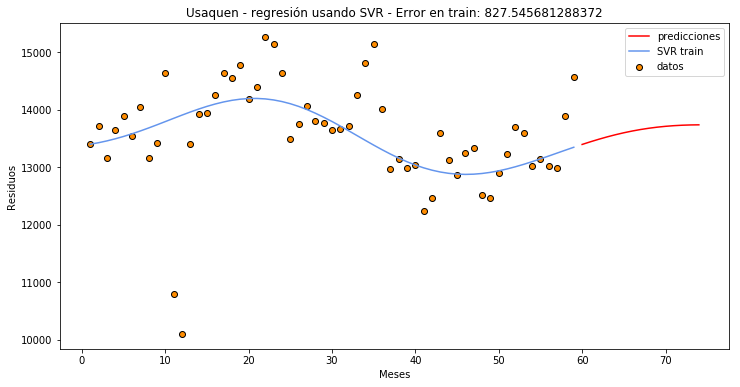

Score entrenamiento R^2:  0.9999999590046345
Support vector (Coeficiente): 0.393


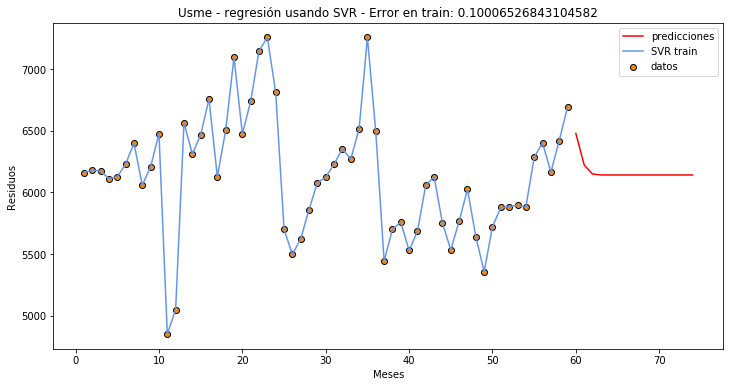

In [223]:
prediciones = func_tools.entrenar_modelo(dic_series, series_list, parametros)   

### Caracterización y disposición